# Portfolio

In [1]:
import pandas as pd
import numpy as np

import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
tickers  = ['AMD', 'AMZN', 'BAC', 'META']
amounts  = [20, 10, 30, 10]

In [3]:
portfolio = {
    'AMD': {
                'amount': 20,
                'date': dt.datetime(2023, 9, 30)
           },
    'AMZN': {
                'amount': 10,
                'date': dt.datetime(2023, 9, 30)
           },
    'BAC': {
                'amount': 30,
                'date': dt.datetime(2023, 9, 30)
           },
    'META': {
                'amount': 10,
                'date': dt.datetime(2023, 9, 30)
           },
}

In [33]:
dl = []

In [34]:
for ticker in list(portfolio.items()):
    print(ticker[0], ticker[1]['date'])
    dl.append(
        [ticker[0],
        yf.download(ticker[0], ticker[1]['date'], dt.datetime.now(), auto_adjust=True)]
    )
dl

AMD 2023-09-30 00:00:00
[*********************100%***********************]  1 of 1 completed
AMZN 2023-09-30 00:00:00
[*********************100%***********************]  1 of 1 completed
BAC 2023-09-30 00:00:00
[*********************100%***********************]  1 of 1 completed
META 2023-09-30 00:00:00
[*********************100%***********************]  1 of 1 completed


[['AMD',                   Open        High         Low       Close     Volume
  Date                                                                 
  2023-10-02  102.209999  103.709999  101.699997  103.269997   45118600
  2023-10-03  101.800003  103.290001   99.169998  100.080002   48117000
  2023-10-04  100.650002  104.400002  100.339996  104.070000   51023200
  2023-10-05  103.410004  103.739998  100.269997  102.910004   51789700
  2023-10-06  102.160004  107.870003  102.029999  107.239998   64807500
  2023-10-09  106.010002  107.309998  104.790001  106.970001   39593200
  2023-10-10  107.489998  110.120003  106.400002  109.010002   57105500
  2023-10-11  109.139999  110.099998  106.930000  108.309998   51085600
  2023-10-12  108.400002  111.309998  107.510002  108.790001   60959400
  2023-10-13  108.650002  108.970001  104.750000  105.089996   52881500
  2023-10-16  105.419998  107.480003  105.029999  106.459999   42464500
  2023-10-17  103.540001  106.290001  101.660004  105.139

In [37]:
dl[0][1]

,Open,High,Low,Close,Volume
Date,,,,,
2023-10-02,102.209999,103.709999,101.699997,103.269997,45118600
2023-10-03,101.800003,103.290001,99.169998,100.080002,48117000
2023-10-04,100.650002,104.400002,100.339996,104.070000,51023200
2023-10-05,103.410004,103.739998,100.269997,102.910004,51789700
2023-10-06,102.160004,107.870003,102.029999,107.239998,64807500
2023-10-09,106.010002,107.309998,104.790001,106.970001,39593200
2023-10-10,107.489998,110.120003,106.400002,109.010002,57105500
2023-10-11,109.139999,110.099998,106.930000,108.309998,51085600
2023-10-12,108.400002,111.309998,107.510002,108.790001,60959400


In [27]:
df = yf.download(list(portfolio.keys()), dt.datetime(2023, 1, 1), dt.datetime.now(), auto_adjust=True)
df

[*********************100%***********************]  4 of 4 completed


Close                                           High  \
                   AMD        AMZN        BAC        META         AMD   
Date                                                                    
2023-01-03   64.019997   85.820000  32.757507  124.739998   66.879997   
2023-01-04   64.660004   85.139999  33.373360  127.370003   65.790001   
2023-01-05   62.330002   83.120003  33.304932  126.940002   64.349998   
2023-01-06   63.959999   86.080002  33.637295  130.020004   64.300003   
2023-01-09   67.239998   87.360001  33.128971  129.470001   69.320000   
...                ...         ...        ...         ...         ...   
2023-11-14  119.879997  145.800003  29.219999  336.309998  122.110001   
2023-11-15  118.000000  143.199997  29.620001  332.709991  120.589996   
2023-11-16  119.830002  142.830002  29.540001  334.190002  120.730003   
2023-11-17  120.620003  145.179993  29.980000  335.040009  121.489998   
2023-11-20  121.220001  146.429993  30.025000  338.829987  121.930000   

                                                      Low              \
                  AMZN        BAC        META         AMD        AMZN   
Date                                                                    
2023-01-03   86.959999  33.324485  126.370003   63.590000   84.209999   
2023-01-04   86.980003  34.038090  129.050003   63.310001   83.360001   
2023-01-05   85.419998  33.373359  128.520004   62.299999   83.070000   
2023-01-06   86.400002  33.803479  130.330002   60.049999   81.430000   
2023-01-09   89.480003  33.979433  132.949997   65.669998   87.080002   
...                ...        ...         ...         ...         ...   
2023-11-14  147.259995  29.410000  338.100006  119.220001  144.679993   
2023-11-15  147.289993  29.730000  338.399994  116.870003  142.589996   
2023-11-16  143.320007  29.700001  334.579987  116.410004  139.520004   
2023-11-17  145.229996  30.000000  335.500000  118.820000  142.539993   
2023-11-20  146.630005  30.049999  341.834991  120.070000  144.725006   

                                         Open                         \
                  BAC        META         AMD        AMZN        BAC   
Date                                                                   
2023-01-03  32.464245  122.279999   66.000000   85.459999  32.483796   
2023-01-04  33.070323  125.849998   65.000000   86.550003  33.138751   
2023-01-05  32.825937  124.540001   64.150002   85.330002  33.158299   
2023-01-06  32.786832  126.040001   63.150002   83.029999  33.324481   
2023-01-09  32.953013  129.279999   66.220001   87.459999  33.969660   
...               ...         ...         ...         ...        ...   
2023-11-14  28.469999  333.329987  119.699997  145.000000  28.500000   
2023-11-15  29.200001  330.019989  120.540001  147.059998  29.200001   
2023-11-16  29.219999  326.380005  117.199997  140.910004  29.430000   
2023-11-17  29.549999  329.350006  119.639999  142.660004  29.709999   
2023-11-20  29.750000  334.190094  120.699997  145.130005  29.980000   

                          Volume                                
                  META       AMD      AMZN       BAC      META  
Date                                                            
2023-01-03  122.820000  46851800  76706000  35221500  35528500  
2023-01-04  127.379997  47477100  68885100  41998500  32397100  
2023-01-05  126.129997  46159500  67930800  34177000  25447100  
2023-01-06  128.970001  70161300  83303400  34068700  27584500  
2023-01-09  131.160004  69741300  65266100  43818800  26649100  
...                ...       ...       ...       ...       ...  
2023-11-14  334.540009  61017400  56674600  66676300  17179400  
2023-11-15  337.929993  59555600  63875700  46968900  14531200  
2023-11-16  329.369995  49661900  49653500  36952800  18932600  
2023-11-17  330.260010  38508900  49636700  38493300  14494400  
2023-11-20  334.890015  30048163  25220954  24801686   9598284  

[223 rows x 20 columns]

In [28]:
prices = df['Close']

In [29]:
prices

,AMD,AMZN,BAC,META
Date,,,,
2023-01-03,64.019997,85.820000,32.757507,124.739998
2023-01-04,64.660004,85.139999,33.373360,127.370003
2023-01-05,62.330002,83.120003,33.304932,126.940002
2023-01-06,63.959999,86.080002,33.637295,130.020004
2023-01-09,67.239998,87.360001,33.128971,129.470001
...,...,...,...,...
2023-11-14,119.879997,145.800003,29.219999,336.309998
2023-11-15,118.000000,143.199997,29.620001,332.709991
2023-11-16,119.830002,142.830002,29.540001,334.190002


In [43]:
total = []
for t, am in zip(tickers, amounts):
    total.append(prices[t][-1] * am)

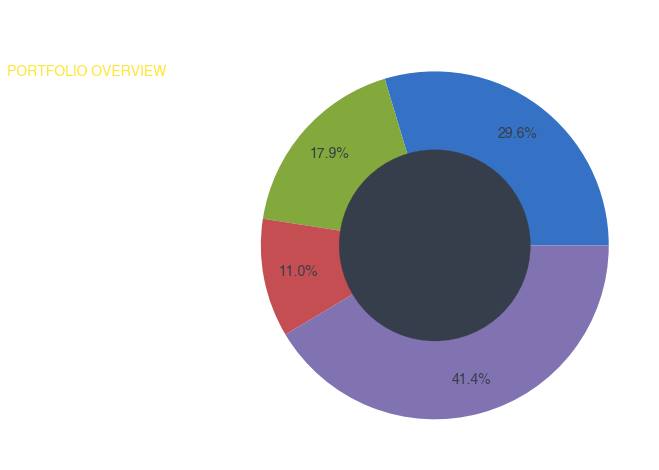

In [84]:
fig, ax = plt.subplots(figsize=(16,8))

ax.set_title('PORTFOLIO VISUALIZER', color='w', fontsize=20)

patches, texts, autotexts = ax.pie(total, labels=tickers, autopct="%1.1f%%", pctdistance=0.8);

[text.set_color('w') for text in texts]
[autotext.set_color('#373E4B') for autotext in autotexts]
[autotext.set_fontsize(14) for autotext in autotexts]

my_circle = plt.Circle((0, 0), 0.55, color='#373E4B')
plt.gca().add_artist(my_circle)

ax.text(-2, 1, 'PORTFOLIO OVERVIEW', fontsize=14,
                                     color='#ffe536',
                                     verticalalignment='center',
                                     horizontalalignment='center')

ax.text(-2, 0.85, f'Total USD Amount: ${sum(total):.2f}',
                                        fontsize=12, color='w',
                                        verticalalignment='center',
                                        horizontalalignment='center')

counter = 0.15
for ticker in tickers:
    ax.text(-2, 0.85-counter, f'{ticker}: ${total[tickers.index(ticker)]: .2f}',
                              fontsize=12, color='w',
                              verticalalignment='center',
                              horizontalalignment='center')
    counter += 0.15